In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('fire_nrt_V1_96617.csv')

## Task 1: Density Plot

1.1

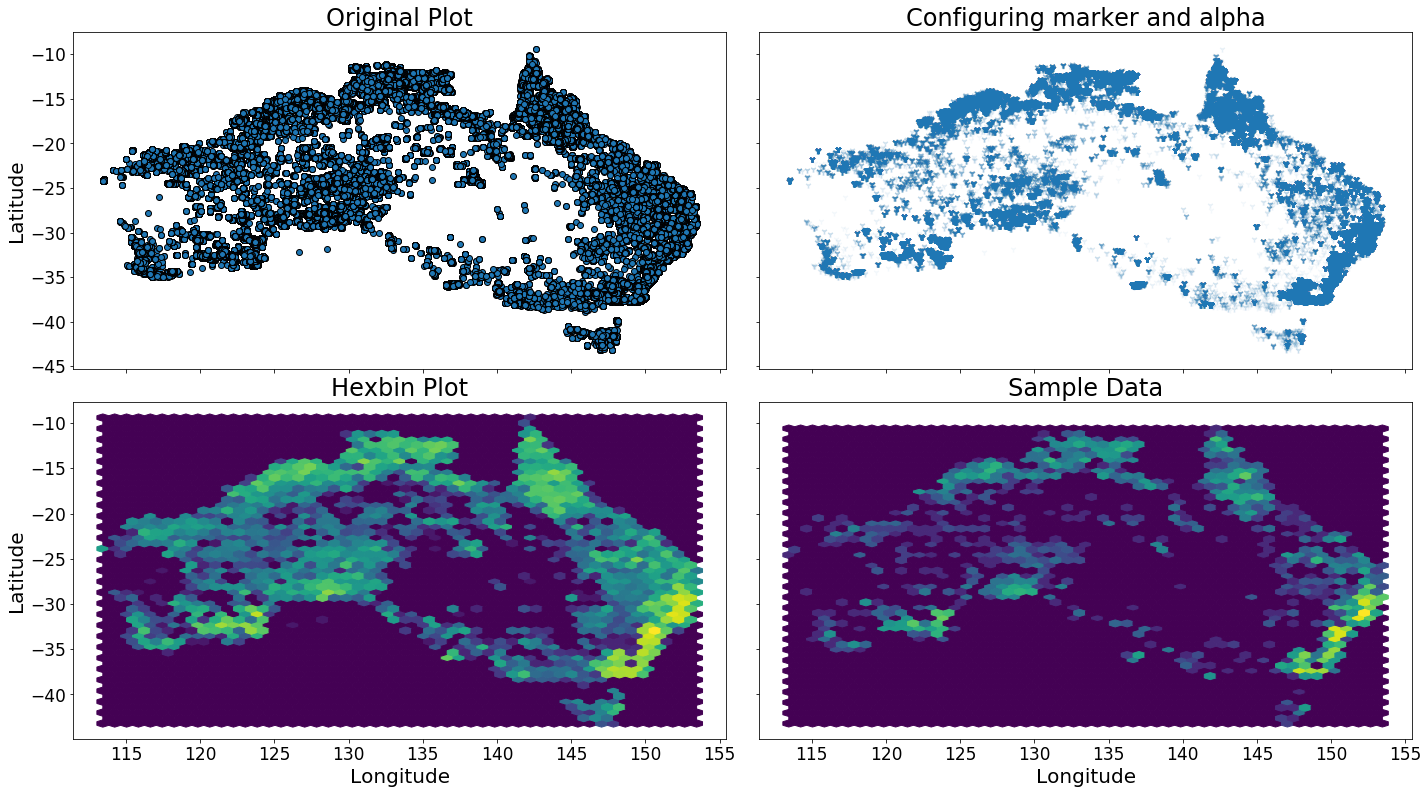

In [21]:
lon = data.loc[:, 'longitude']
lat = data.loc[:, 'latitude']
sample_data = data.sample(10000)
fig, axes = plt.subplots(2,2,sharey='row', sharex='col')
fig.set_size_inches(24, 13)
plt.subplots_adjust(wspace =0.05, hspace =0.1)
axes[1][0].set_xlabel('Longitude', fontsize=20)
axes[1][1].set_xlabel('Longitude', fontsize=20)
axes[0][0].set_ylabel('Latitude', fontsize=20)
axes[1][0].set_ylabel('Latitude', fontsize=20)
for i in range(2):
    for j in range(2):
        labels = axes[i][j].get_xticklabels() + axes[i][j].get_yticklabels()
        [label.set_fontsize(17) for label in labels]
axes[0][0].scatter(x=lon, y=lat,cmap='bwr',edgecolor='k')
axes[0][0].set_title('Original Plot', fontsize=24)
axes[0][1].scatter(x=lon, y=lat, alpha=0.05, marker='1')
axes[0][1].set_title('Configuring marker and alpha', fontsize=24)
axes[1][0].hexbin(x=lon, y=lat, gridsize=50, bins='log')
axes[1][0].set_title('Hexbin Plot', fontsize=24)
axes[1][1].hexbin(x=sample_data.loc[:, 'longitude'], y=sample_data.loc[:, 'latitude'], gridsize=50, bins='log')
axes[1][1].set_title('Sample Data', fontsize=24)
plt.show()

1.2

Most of the measurements located at main coastal and inland areas in the west and east coast.

## Task 2: Visualizing class membership

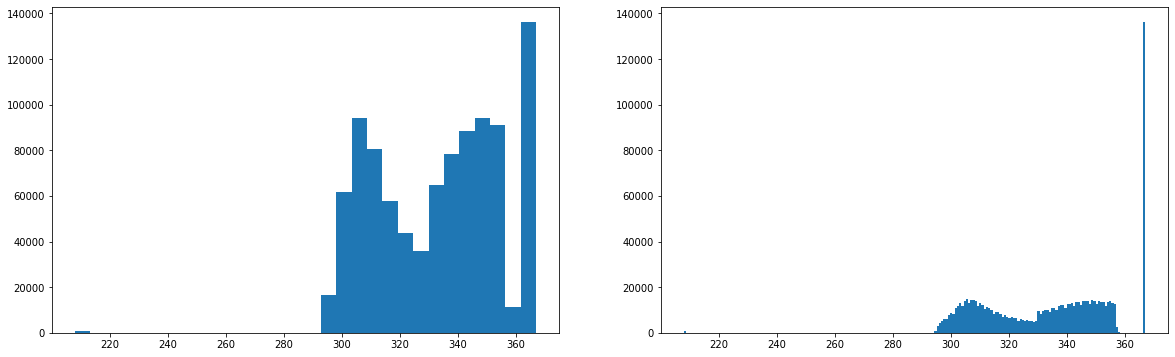

In [22]:
tem = data.loc[:, 'bright_ti4'];
fig,ax=plt.subplots(1,2,figsize=(20,6));
ax[0].hist(tem,bins=30);
ax[1].hist(tem,bins="auto");

2.1

In [23]:
lon1 = lon[tem<360];
lon2 = lon[tem>360];
lat1 = lat[tem<360];
lat2 = lat[tem>360];

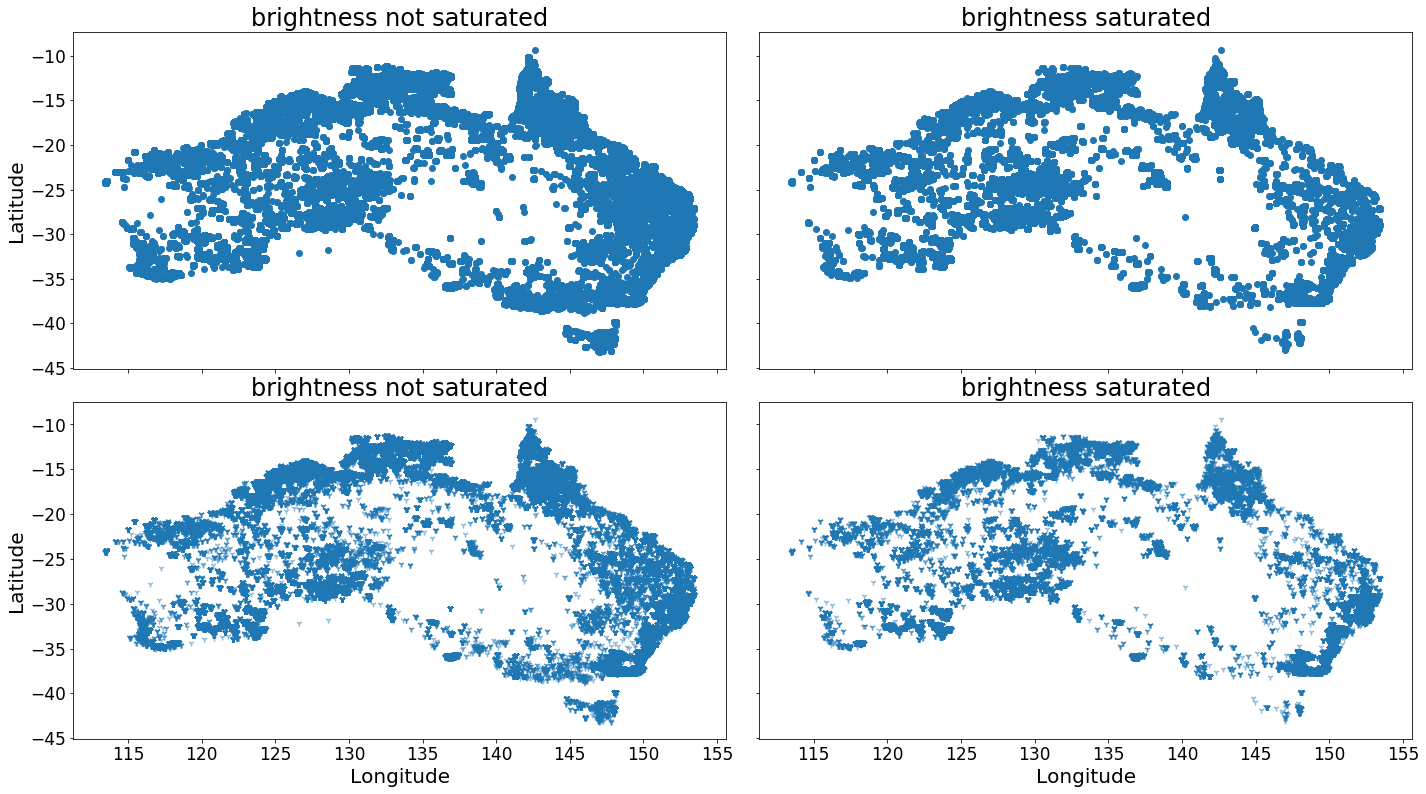

In [24]:
fig, axes = plt.subplots(2,2,sharey='row', sharex='col')
fig.set_size_inches(24, 13)
plt.subplots_adjust(wspace =0.05, hspace =0.1)
axes[1][0].set_xlabel('Longitude', fontsize=20)
axes[1][1].set_xlabel('Longitude', fontsize=20)
axes[0][0].set_ylabel('Latitude', fontsize=20)
axes[1][0].set_ylabel('Latitude', fontsize=20)
for i in range(2):
    for j in range(2):
        labels = axes[i][j].get_xticklabels() + axes[i][j].get_yticklabels()
        [label.set_fontsize(17) for label in labels]
axes[0][0].scatter(x=lon1, y=lat1)
axes[0][0].set_title('brightness not saturated', fontsize=24)
axes[0][1].scatter(x=lon2, y=lat2)
axes[0][1].set_title('brightness saturated', fontsize=24)
axes[1][0].scatter(x=lon1, y=lat1, alpha=0.5, marker='1')
axes[1][0].set_title('brightness not saturated', fontsize=24)
axes[1][1].scatter(x=lon2, y=lat2, alpha=0.5, marker='1')
axes[1][1].set_title('brightness saturated', fontsize=24)
plt.show()

From the picture above we can see that the distribution of "brightness not saturated" is denser than the distribution of "brightness saturated".And the former distrubution is more like the picture in problem 1, which is the overall distribution.

2.2

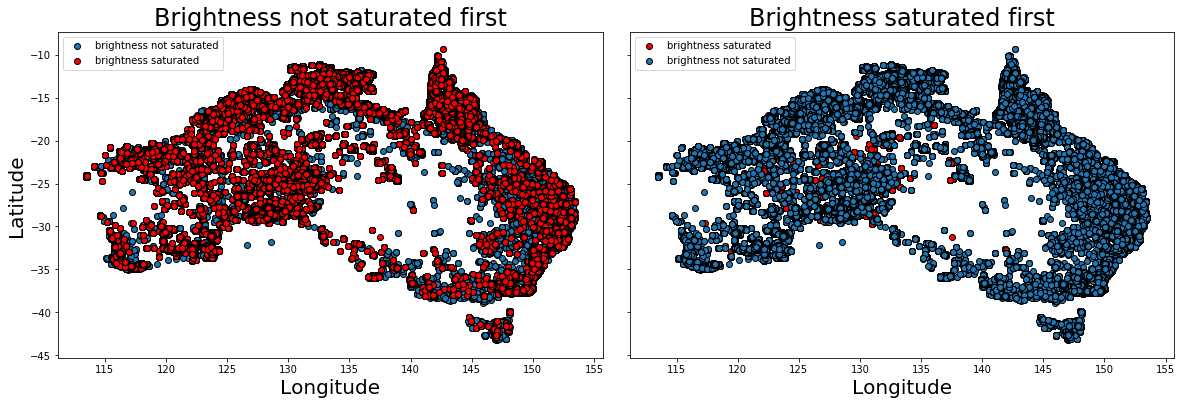

In [36]:
fig, axes = plt.subplots(1,2,sharey='row', sharex='col')
fig.set_size_inches(20, 6)
plt.subplots_adjust(wspace =0.05, hspace =0.1)

axes[0].set_xlabel('Longitude', fontsize=20)
axes[0].set_ylabel('Latitude', fontsize=20)
axes[1].set_xlabel('Longitude', fontsize=20)
axes[0].scatter(x=lon1, y=lat1,edgecolor='k',label="brightness not saturated")
axes[0].set_title('Brightness not saturated first', fontsize=24)
axes[0].scatter(x=lon2, y=lat2, c='r',edgecolor='k',label="brightness saturated")
axes[0].legend()
axes[1].scatter(x=lon2, y=lat2, c='r',edgecolor='k',label="brightness saturated")
axes[1].set_title('Brightness saturated first', fontsize=24)
axes[1].scatter(x=lon1, y=lat1,edgecolor='k',label="brightness not saturated")
axes[1].legend()
plt.show()

Because the distribution of "brightness saturated" is a map of what we believe is a fire, it should contain fewer events than the distribution of "brightness not saturated".Thus if we plot the distribution of "brightness not saturated" first, we can still see it at the bottom.Otherwise we can observe that the top distribution covers the bottom one and we cannot see the distribution of "brightness saturated".

2.3

We can use heatmap to compare the two distribution.

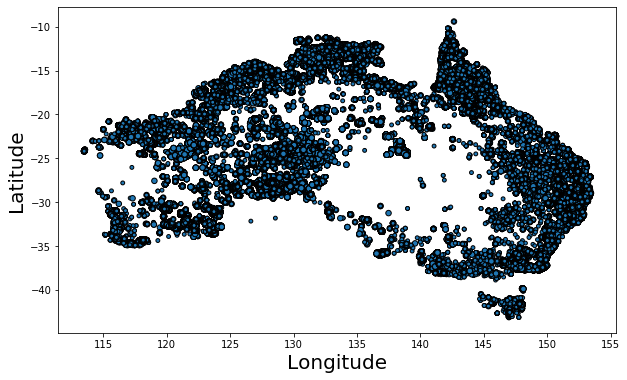

In [38]:
fig, axes = plt.subplots(1,1,sharey='row', sharex='col')
fig.set_size_inches(10, 6)
plt.subplots_adjust(wspace =0.05, hspace =0.1)

axes.set_xlabel('Longitude', fontsize=20)
axes.set_ylabel('Latitude', fontsize=20)

axes.scatter(x=lon, y=lat,s=z,cmap='bwr',edgecolor='k')

plt.show()

In [39]:
x = lon;
y = lat;
arr = pd.DataFrame(x,y,z)

plt.matshow(arr,cmap='hot')
plt.colorbar()
plt.show()

MemoryError: 

TypeError: Invalid shape (100,) for image data

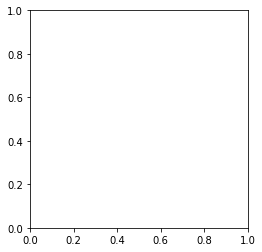

In [6]:
x = lon[1:100];
y = lat[1:100];
fig,ax=plt.subplots(1,1)
im = ax.imshow(z,cmap='gray')
plt.colorbar(im)
plt.show()

In [ ]:
lon = data.loc[:, 'longitude']
lat = data.loc[:, 'latitude']

In [37]:
tem = data.loc[:, 'bright_ti4'];z=[];
for i in range(len(lon)):
    if tem[i]>360:
        z.append(30)
    else:
        z.append(15)